# SVM

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys; sys.path.append('../')
from DataPreparing.data_preparing import *
from DataPreparing.HandleClassImbalance import *
from Evaluation.evaluate import *
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE,SMOTENC,SMOTEN,BorderlineSMOTE
from imblearn.under_sampling import NearMiss,RandomUnderSampler
from sklearn.model_selection import train_test_split

# Read Data

In [13]:
#read csv file without header and index into dataframe
df1=  pd.read_csv('../DataFiles/gcn_new_embeddings2/group3/concatEmbeddings_194.csv', header=None, index_col=None)
df2=  pd.read_csv('../DataFiles/gcn_new_embeddings2/group3/concatEmbeddings_126.csv', header=None, index_col=None)
df3=  pd.read_csv('../DataFiles/gcn_new_embeddings2/group3/concatEmbeddings_23.csv', header=None, index_col=None)
df4=  pd.read_csv('../DataFiles/gcn_new_embeddings2/group3/concatEmbeddings_401.csv', header=None, index_col=None)
df5=  pd.read_csv('../DataFiles/gcn_new_embeddings2/group3/concatEmbeddings_690.csv', header=None, index_col=None)


In [14]:
df = pd.concat([df1, df2,df3,df4, df5], ignore_index=True)
df.to_csv('../DataFiles/gcn_new_embeddings2/group3/group3.csv', index=False, header=False)

In [15]:
df = df.drop(df.columns[0], axis=1)

In [16]:
df_numpy = df.to_numpy()
features = df_numpy[:, :-1]
labels = df_numpy[:, -1]
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=0)

In [17]:
# X_train, X_val, y_train, y_val =read_data("../DataFiles/gcn_new_embeddings2/group1.csv", drop_1st_col=True)

In [18]:
print(set(y_train))

{'CWE126', 'CWE23', 'CWE690', 'CWE194', 'CWE401'}


{'CWE126': 1555, 'CWE194': 1295, 'CWE23': 2647, 'CWE401': 1814, 'CWE690': 1041}


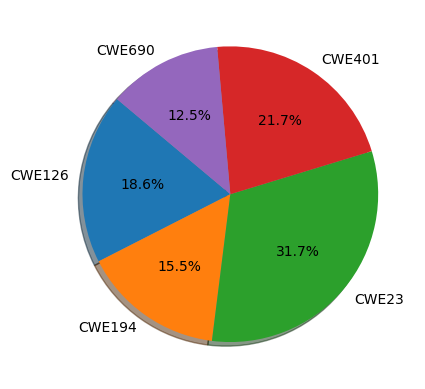

In [19]:
show_proportions(y_train)
unique, counts = np.unique(y_train, return_counts=True)
plt.pie(counts, labels=unique, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

# Initial Fit

## SVM


In [23]:
%%time
clf = svm.SVC( kernel='rbf',  probability=True)
clf.fit(X_train, y_train)
evaluate(clf, X_val,y_val , clf.predict(X_train), y_train)

Training Accurracy: 92.46886973180077%
              precision    recall  f1-score   support

      CWE126       0.94      0.92      0.93       394
      CWE194       0.99      0.90      0.94       297
       CWE23       1.00      0.98      0.99       666
      CWE401       0.97      0.81      0.88       447
      CWE690       0.71      1.00      0.83       285

    accuracy                           0.93      2089
   macro avg       0.92      0.92      0.92      2089
weighted avg       0.94      0.93      0.93      2089

CPU times: total: 2min 10s
Wall time: 2min 28s


## LR

In [11]:
clf=LogisticRegression(random_state=0 , solver='lbfgs', multi_class='multinomial')
clf.fit(X_train, y_train)
evaluate(clf, X_val,y_val, clf.predict(X_train), y_train)

C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accurracy: 99.84390243902439%
              precision    recall  f1-score   support

      CWE121       1.00      1.00      1.00      1191
      CWE122       1.00      1.00      1.00      1665
      CWE190       0.99      1.00      1.00       970
       CWE78       1.00      1.00      1.00      1300

    accuracy                           1.00      5126
   macro avg       1.00      1.00      1.00      5126
weighted avg       1.00      1.00      1.00      5126



In [24]:
#save model
save_model(clf, "rbf_svm_group3_prob")

## Test Safe Files

In [20]:
# loop on csv files in the folder
import os
import pandas as pd
import numpy as np

path = "../DataFiles/gcn_embeddings/group1/safe_concat/"
all_probabilities,x_safe_test,y_safe_test= get_class_probs(path,clf)

['concatEmbeddings_121.csv', 'concatEmbeddings_122.csv', 'concatEmbeddings_190.csv', 'concatEmbeddings_78.csv']


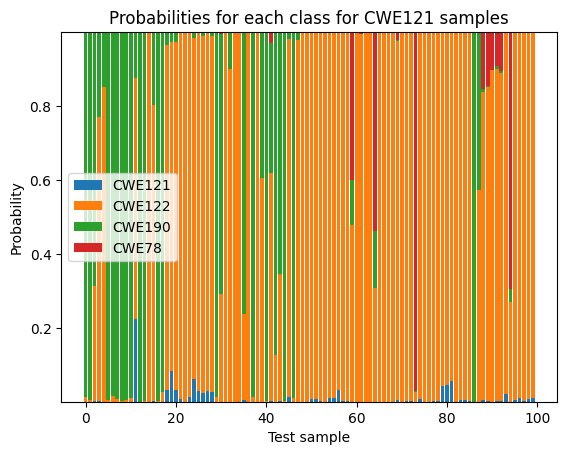

In [16]:
show_probs(all_probabilities[0], clf,"CWE121")


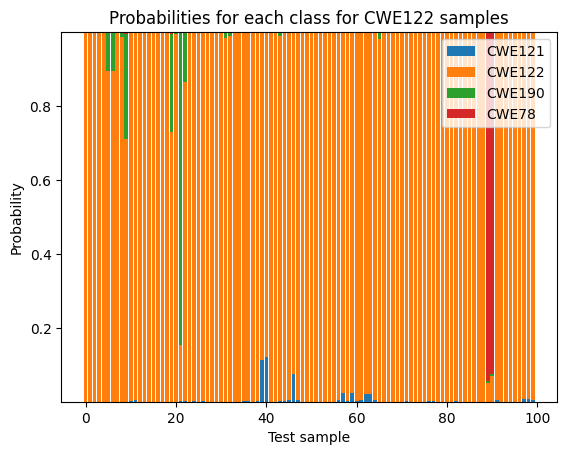

In [17]:
show_probs(all_probabilities[1], clf,"CWE122")

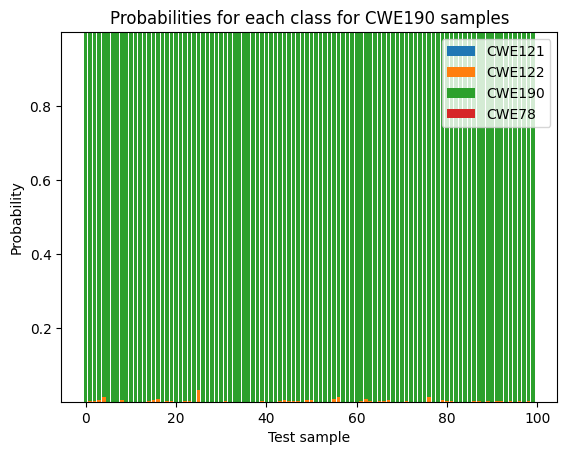

In [18]:
show_probs(all_probabilities[2], clf,"CWE190")

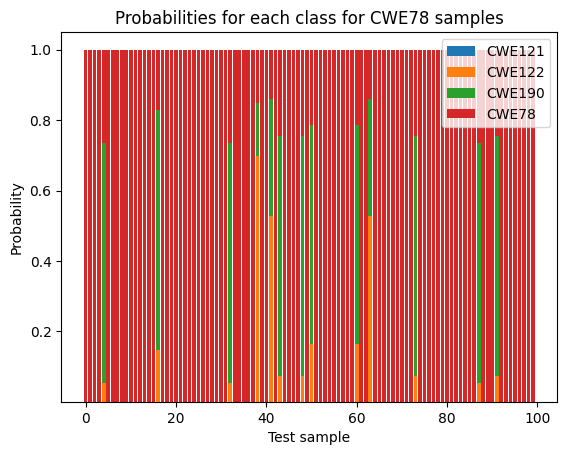

In [19]:
show_probs(all_probabilities[3], clf,"CWE78")